 # Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import re
import string
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

# Import Dataset

In [3]:
df = pd.read_csv('D:\data science\Toxic comment classification/train.csv',encoding='latin-1',lineterminator='\n',error_bad_lines=False)
df

C:\Users\kishore\AppData\Local\Temp\ipykernel_8940\769774277.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('D:\data science\Toxic comment classification/train.csv',encoding='latin-1',lineterminator='\n',error_bad_lines=False)
Skipping line 19: expected 8 fields, saw 10
Skipping line 150: expected 8 fields, saw 21
Skipping line 2159: expected 8 fields, saw 9
Skipping line 3129: expected 8 fields, saw 9
Skipping line 3426: expected 8 fields, saw 10
Skipping line 5753: expected 8 fields, saw 9
Skipping line 6784: expected 8 fields, saw 15
Skipping line 6947: expected 8 fields, saw 13
Skipping line 7355: expected 8 fields, saw 9
Skipping line 7468: expected 8 fields, saw 9
Skipping line 7606: expected 8 fields, saw 9
Skipping line 7674: expected 8 fields, saw 9
Skipping line 7778: expected 8 fields, saw 11
Skipping line 8282: expected 8 fields, saw 12
Skipping line 8289: ex

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
164089  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
164090  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
164091  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
164092  fff125370e4aaaf3  And it looks like it was actually you who put ...   
164093  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

       toxic severe_toxic obscene threat insult identity_hate  
0          0            0       0      0      0             0  
1          0            0       0      0      0             0  
2          0            0       0      0      0             0  
3          0            0       0      0      0             0  
4          0            0       0      0      0             0  
...      ...          ...     ...    ...    ...           ...  
164089     0            0       0      0      0             0  
164090     0            0       0      0      0             0  
164091     0            0       0      0      0             0  
164092     0            0       0      0      0             0  
164093     0            0       0      0      0             0  

[164094 rows x 8 columns]

### Shape of the data 

In [4]:
df.shape

(164094, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164094 entries, 0 to 164093
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             164093 non-null  object
 1   comment_text   160602 non-null  object
 2   toxic          159691 non-null  object
 3   severe_toxic   159464 non-null  object
 4   obscene        159346 non-null  object
 5   threat         159263 non-null  object
 6   insult         159225 non-null  object
 7   identity_hate  158888 non-null  object
dtypes: object(8)
memory usage: 10.0+ MB


### Checking the Null the Values

In [6]:
df.isnull().sum()

id                  1
comment_text     3492
toxic            4403
severe_toxic     4630
obscene          4748
threat           4831
insult           4869
identity_hate    5206
dtype: int64

#### We can see there are lot of Null Values,so we can drop them

In [7]:
df.dropna(inplace=True)

#### After droping the Null value again checking the Null Values

In [8]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
df.shape

(158888, 8)

#### Checking first and last 15 rows 

In [10]:
df.head(15)

id  \
0                                    0000997932d777bf   
1                                    000103f0d9cfb60f   
2                                    000113f07ec002fd   
3                                    0001b41b1c6bb37e   
4                                    0001d958c54c6e35   
5                                    00025465d4725e87   
6                                    0002bcb3da6cb337   
7                                    00031b1e95af7921   
8                                    00037261f536c51d   
9                                    00040093b2687caa   
12  Thanks for uploading Image:Wonju.jpg. I notice...   
14                                   00054a5e18b50dd4   
15                                   0005c987bdfc9d4b   
16                                   0006f16e4e9f292e   
17                                   00070ef96486d6f9   

                                         comment_text  \
0   Explanation\nWhy the edits made under my usern...   
1   D'aww! He matches this background colour I'm s...   
2   Hey man, I'm really not trying to edit war. It...   
3   "\nMore\nI can't make any real suggestions on ...   
4   You, sir, are my hero. Any chance you remember...   
5   "\n\nCongratulations from me as well, use the ...   
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   Your vandalism to the Matt Shirvington article...   
8   Sorry if the word 'nonsense' was offensive to ...   
9   alignment on this subject and which are contra...   
12   so the copyright status is unclear. If you di...   
14  bbq \n\nbe a man and lets discuss it-maybe ove...   
15  Hey... what is it..\n@ | talk .\nWhat is it......   
16  Before you start throwing accusations and warn...   
17  Oh, and the girl above started her arguments w...   

                                                toxic  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
5                                                   0   
6                                                   1   
7                                                   0   
8                                                   0   
9                                                   0   
12   then you will need to specify the owner of th...   
14                                                  0   
15                                                  1   
16                                                  0   
17                                                  0   

                                         severe_toxic  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
5                                                   0   
6                                                   1   
7                                                   0   
8                                                   0   
9                                                   0   
12   then a link to the website from which it was ...   
14                                                  0   
15                                                  0   
16                                                  0   
17                                                  0   

                                              obscene  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
5                                                   0   


In [11]:
df.tail(15)

id                                       comment_text  \
164079  ffc671f2acdd80e1  I'll be on IRC, too, if you have a more specif...   
164080  ffc7bbb177c3c966  It is my opinion that that happens to be off-t...   
164081  ffca1e81aefc48ac  Please stop removing content from Wikipedia; i...   
164082  ffca8d71d71a3fae  Image:Barack-obama-mother.jpg listed for delet...   
164083  ffcdcb71854f6d8a  "Editing of article without Consensus & Remova...   
164084  ffd2e85b07b3c7e4  "\nNo he did not, read it again (I would have ...   
164085  ffd72e9766c09c97  "\n Auto guides and the motoring press are not...   
164086  ffe029a7c79dc7fe  "\nplease identify what part of BLP applies be...   
164087  ffe897e7f7182c90  Catalan independentism is the social movement ...   
164088  ffe8b9316245be30  The numbers in parentheses are the additional ...   
164089  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
164090  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
164091  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
164092  fff125370e4aaaf3  And it looks like it was actually you who put ...   
164093  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

       toxic severe_toxic obscene threat insult identity_hate  
164079     0            0       0      0      0             0  
164080     0            0       0      0      0             0  
164081     0            0       0      0      0             0  
164082     0            0       0      0      0             0  
164083     0            0       0      0      0             0  
164084     0            0       0      0      0             0  
164085     0            0       0      0      0             0  
164086     0            0       0      0      0             0  
164087     0            0       0      0      0             0  
164088     0            0       0      0      0             0  
164089     0            0       0      0      0             0  
164090     0            0       0      0      0             0  
164091     0            0       0      0      0             0  
164092     0            0       0      0      0             0  
164093     0            0       0      0      0             0

#### We can see some of classes contains text instead of 0's and 1's so we will remove them

In [12]:
df= df[df['toxic'].str.contains('[A-Z]+') == False]
df = df[df['severe_toxic'].str.contains('[A-Z]+') == False]
df = df[df['obscene'].str.contains('[A-Z]+') == False]
df = df[df['threat'].str.contains('[A-Z]+') == False]
df = df[df['insult'].str.contains('[A-Z]+') == False]
df = df[df['identity_hate'].str.contains('[A-Z]+') == False]

In [13]:
df.head(15)

id                                       comment_text toxic  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...     0   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...     0   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...     0   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...     0   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...     0   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...     0   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK     1   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...     0   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...     0   
9   00040093b2687caa  alignment on this subject and which are contra...     0   
14  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...     0   
15  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......     1   
16  0006f16e4e9f292e  Before you start throwing accusations and warn...     0   
17  00070ef96486d6f9  Oh, and the girl above started her arguments w...     0   
18  00078f8ce7eb276d  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...     0   

   severe_toxic obscene threat insult identity_hate  
0             0       0      0      0             0  
1             0       0      0      0             0  
2             0       0      0      0             0  
3             0       0      0      0             0  
4             0       0      0      0             0  
5             0       0      0      0             0  
6             1       1      0      1             0  
7             0       0      0      0             0  
8             0       0      0      0             0  
9             0       0      0      0             0  
14            0       0      0      0             0  
15            0       0      0      0             0  
16            0       0      0      0             0  
17            0       0      0      0             0  
18            0       0      0      0             0

In [14]:
df.shape

(158866, 8)

In [15]:
df.reset_index(inplace=True)

### Checking the data types

In [16]:
df.dtypes

index             int64
id               object
comment_text     object
toxic            object
severe_toxic     object
obscene          object
threat           object
insult           object
identity_hate    object
dtype: object

#### We can see that class columns has data type as Object instead of integer so we will convert them to integer 

In [17]:
df['toxic']=df['toxic'].astype(int)
df['severe_toxic']=df['severe_toxic'].astype(int)
df['obscene']=df['obscene'].astype(int)
df['threat']=df['threat'].astype(int)
df['insult']=df['insult'].astype(int)
df['identity_hate']=df['identity_hate'].astype(int)

In [18]:
df.dtypes

index             int64
id               object
comment_text     object
toxic             int32
severe_toxic      int32
obscene           int32
threat            int32
insult            int32
identity_hate     int32
dtype: object

#### Checking first 5 comments 

In [19]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [20]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [21]:
df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [22]:
df['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [23]:
df['comment_text'][4]

"You, sir, are my hero. Any chance you remember what page that's on?"

#### The comments are with '\n' values, symbols, numbers that will not be useful for analysis. We will be remove them in text preprocessing

# Text Preprocessing

#### removing all numbers with letters attached to them

In [24]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

#### '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
#### .lower() - convert all strings to lowercase 

In [25]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

#### Removes all '\n' in the string and replace it with a space

In [26]:
remove_n = lambda x: re.sub("\n", " ", x)


#### Remove all non-ascii characters 

In [27]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

#### Applying all the lambda functions wrote previously through .map on the comments column

In [28]:
df['comment_text'] = df['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [29]:
df['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

### Creating a new subset of the data by only taking the 2nd column onwards

In [35]:
data_count = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

In [36]:
data_count

toxic            15279
severe_toxic      1595
obscene           8441
threat             478
insult            7872
identity_hate     1404
dtype: int64

## Creating Countplot for all the six catagories

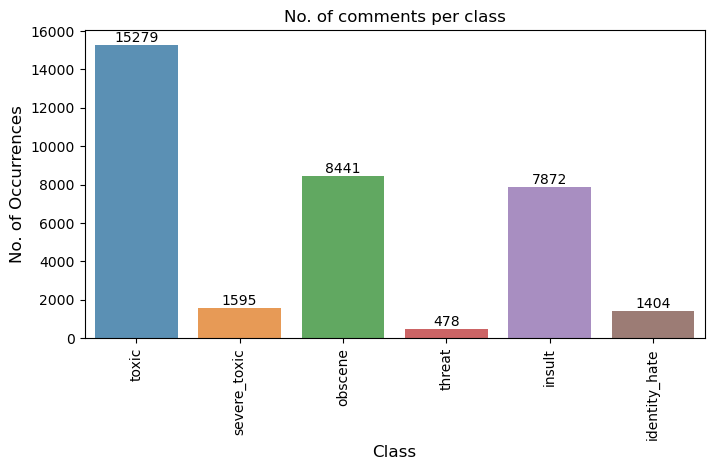

In [37]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=data_count.index, y=data_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding value counts above each bar
for i, v in enumerate(data_count.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


In [32]:
num_rows = len(df)
print(num_rows)

158866


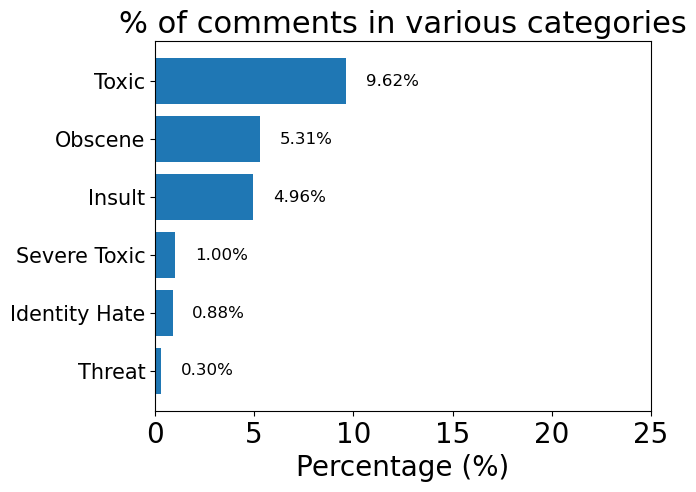

In [38]:
# Calculating  the percentages
sum_tox = df['toxic'].sum() / num_rows * 100
sum_sev = df['severe_toxic'].sum() / num_rows * 100
sum_obs = df['obscene'].sum() / num_rows * 100
sum_thr = df['threat'].sum() / num_rows * 100
sum_ins = df['insult'].sum() / num_rows * 100
sum_ide = df['identity_hate'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()

# Add percentage values to each bar
for i, v in enumerate([sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr]):
    plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=12, color='black')

plt.show()


# Separting our dataset into six sections , each section is one class

In [39]:
data_tox = df.loc[:,['id','comment_text','toxic']]
data_sev = df.loc[:,['id','comment_text','severe_toxic']]
data_obs = df.loc[:,['id','comment_text','obscene']]
data_thr = df.loc[:,['id','comment_text','threat']]
data_ins = df.loc[:,['id','comment_text','insult']]
data_ide = df.loc[:,['id','comment_text','identity_hate']]

# Wordcloud

In [40]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#### Generating all the different catagerious Wordcloud

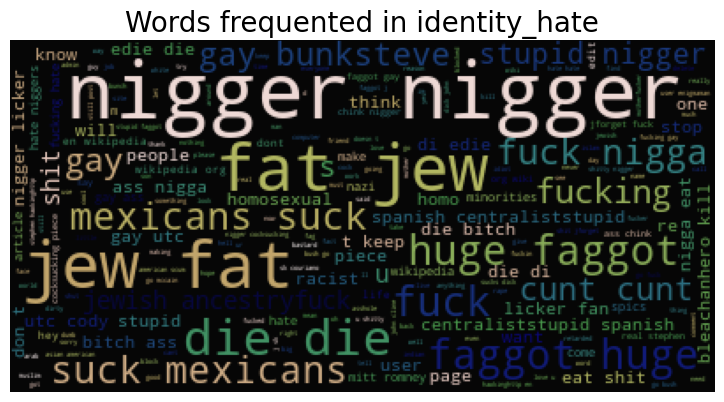

In [41]:
wordcloud(data_ide,'identity_hate')

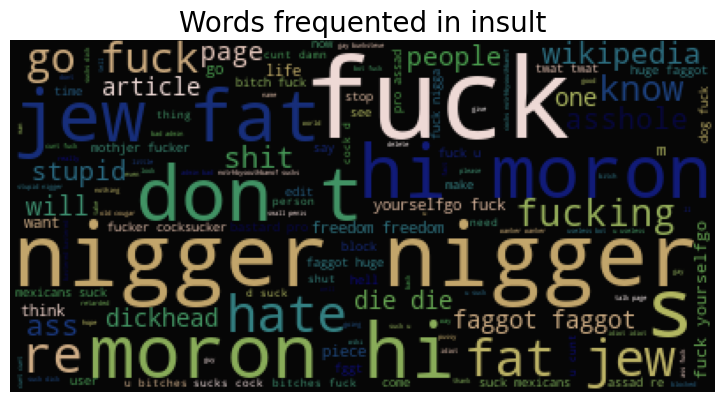

In [42]:
wordcloud(data_ins, 'insult')

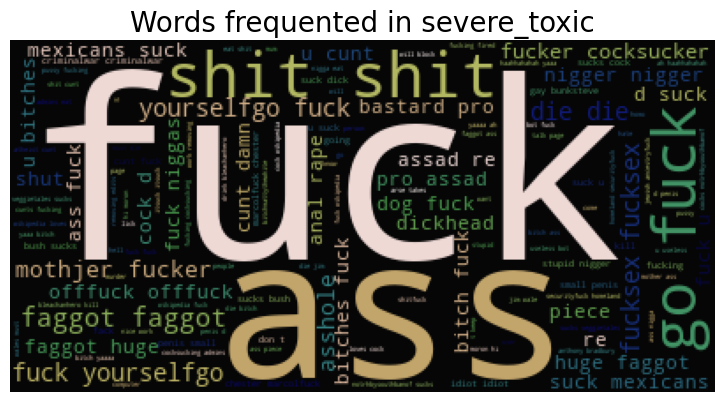

In [43]:
wordcloud(data_sev, 'severe_toxic')

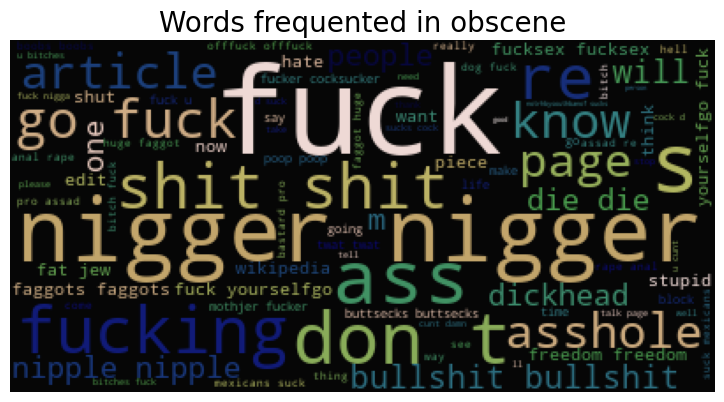

In [44]:
wordcloud(data_obs, 'obscene')

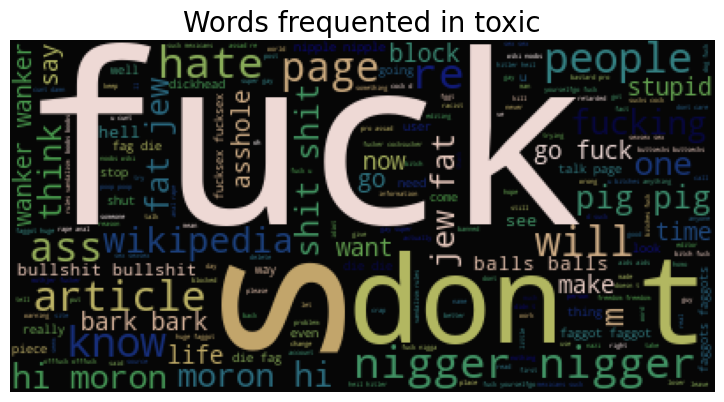

In [45]:
wordcloud(data_tox, 'toxic')

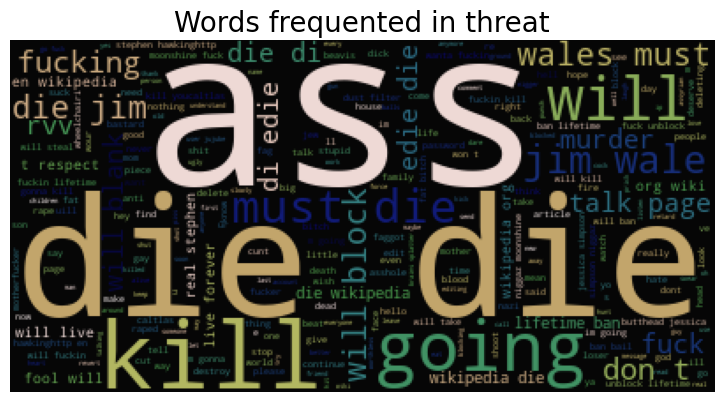

In [46]:
wordcloud(data_thr, 'threat')

## Wordcloud for Non-Toxic Commnets 

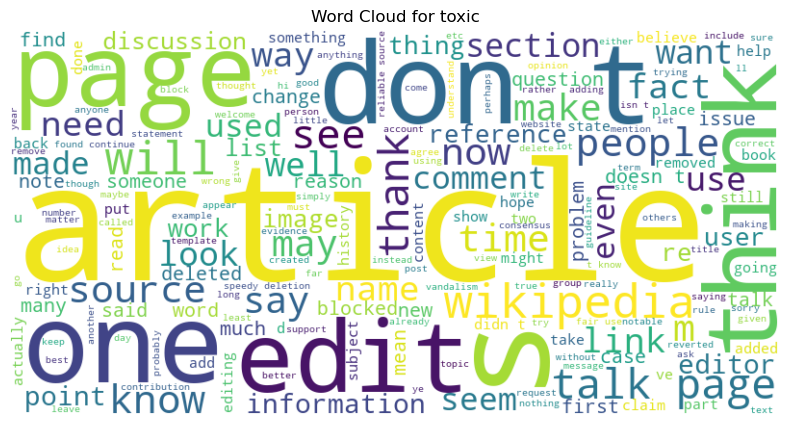

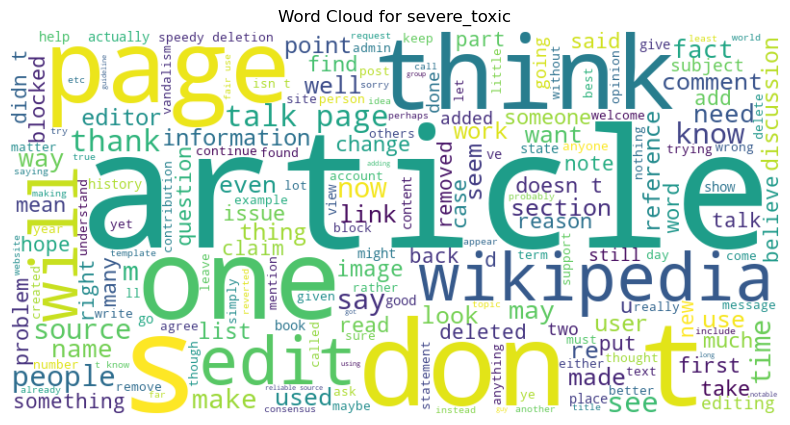

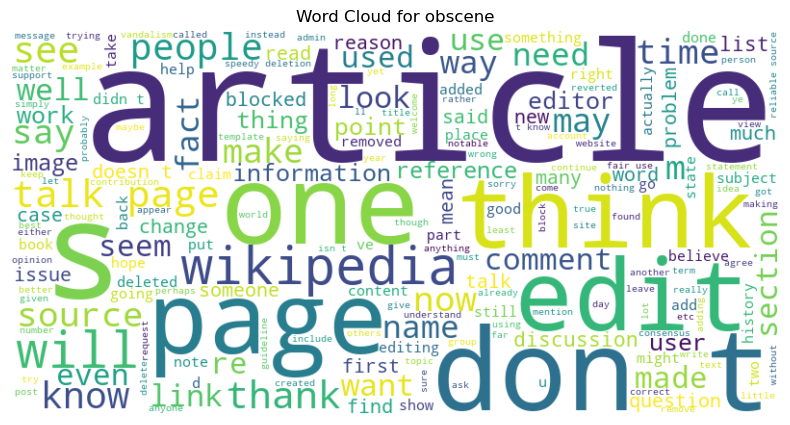

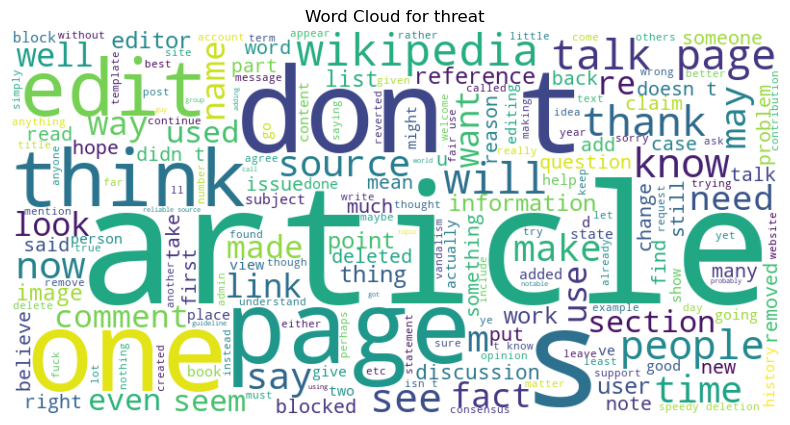

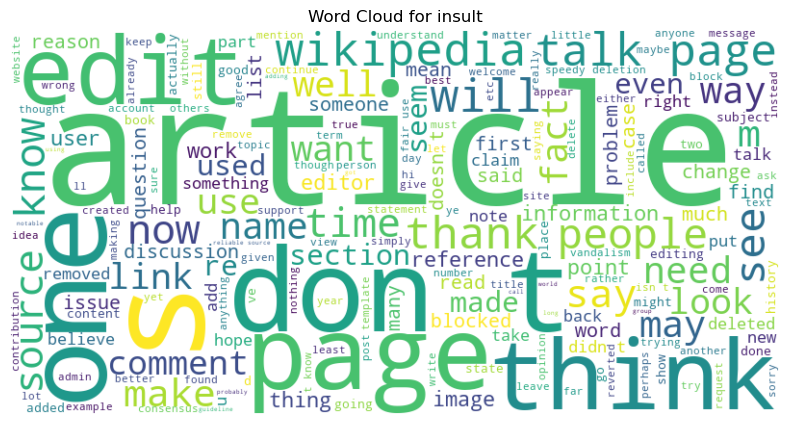

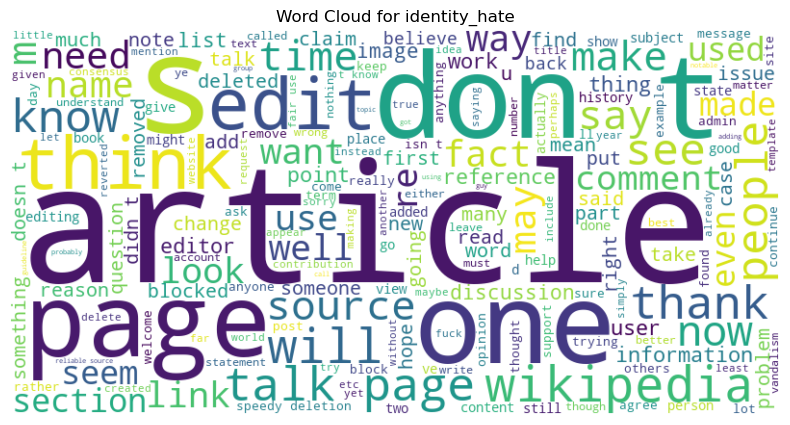

In [49]:
# Create word clouds for each category
categories = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for category in categories:
    # Filter rows where the category column is 0 (indicating non-toxic comments)
    non_toxic_comments = df[df[category] == 0]

    # Combine the text of all non-toxic comments into a single string
    non_toxic_text = ' '.join(non_toxic_comments['comment_text'])

    # Generate the word cloud for the current category
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {category}")
    plt.show()
